In [133]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import re
import linecache as ln

In [134]:
sys.path.append("/home/piotr/MHCevo/PyScripts/")

In [220]:
from file_len import file_len

In [329]:
cd /home/piotr/Documents/MHC_UAM/Resuls/2018-06-25_long_slow_de_dupl/MHC.10/

/home/piotr/Documents/MHC_UAM/Resuls/2018-06-25_long_slow_de_dupl/MHC.10


In [330]:
ls -l

total 177652
-rw-r--r-- 1 piotr piotr 90266960 Jun 25 00:13 HostGeneNumbTotal_ChrOne.csv
-rw-r--r-- 1 piotr piotr   126024 Jun 12 03:14 HostGenomesFile.0.csv
-rw-r--r-- 1 piotr piotr 90266960 Jun 25 00:13 HostMHCsNumbUniq_ChrOne.csv
-rw-r--r-- 1 piotr piotr  1112462 Jun 25 00:13 HostsGeneDivers.csv
-rw-r--r-- 1 piotr piotr      901 Jun 12 03:14 InputParameters.csv
-rw-rw-r-- 1 piotr piotr    62168 Jul 30 21:29 MHC_pop_stats.png
-rw-rw-r-- 1 piotr piotr    61115 Jul 30 21:29 MHC_size_hist.png
-rw-r--r-- 1 piotr piotr       60 Jun 12 03:14 NoMutationInPathoList.csv


In [331]:
shift = 50
kk = file_len("HostMHCsNumbUniq_ChrOne.csv")
ll = re.split(" ", ln.getline("HostMHCsNumbUniq_ChrOne.csv", kk-shift))
print("There are here", len(ll)-1, "individuals in line", kk)
mm = file_len("HostGeneNumbTotal_ChrOne.csv")
oo = re.split(" ", ln.getline("HostGeneNumbTotal_ChrOne.csv", mm-shift))
print("There are here", len(oo)-1, "individuals in line", mm)

There are here 1000 individuals in line 45005
There are here 1000 individuals in line 45005


In [332]:
chromSize = np.array(ll[:-1], dtype=np.int)
totSize = np.array(oo[:-1], dtype=np.int)

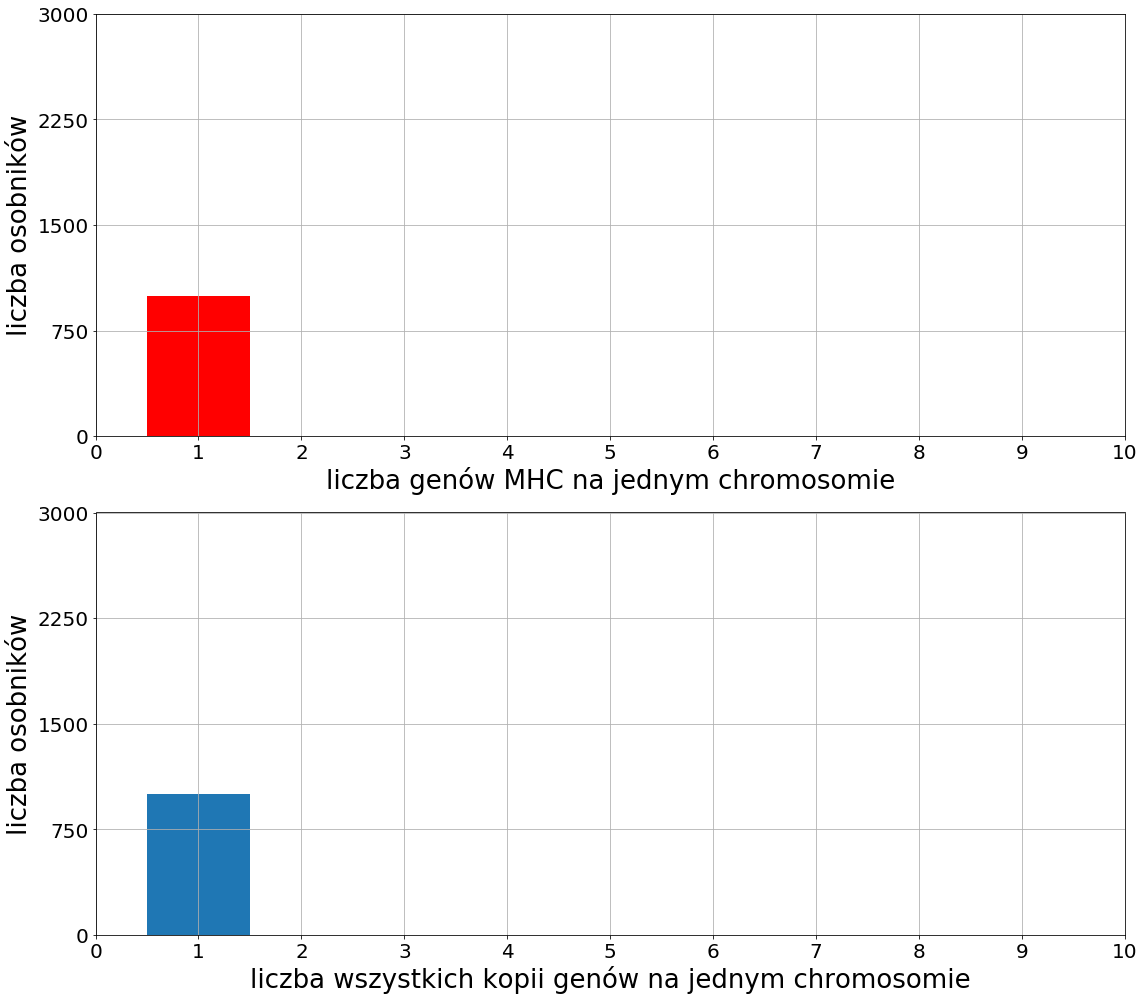

In [333]:
BinzMax = 9
bw = 1.0  # bin width
tf = 1.0  # how dence are ticks
binz = np.arange(-0.5, 1+BinzMax+0.5, bw)
xTikz = np.arange(-0.5, 1+BinzMax+0.5, tf)
LabelFS = 26
TicksFS = 20
yTikz = np.arange(0, 3501, 750)
# ===========================
plt.figure(2, figsize=(16, 14))
plt.subplot(211)
h = plt.hist(chromSize, bins=binz, color="r")
#plt.xlabel("number of unique MHC alles per host's Chromosome One", fontsize=LabelFS)
plt.xlabel("liczba genów MHC na jednym chromosomie", fontsize=LabelFS)
#plt.ylabel("abundance", fontsize=LabelFS)
plt.ylabel("liczba osobników", fontsize=LabelFS)
plt.xticks(xTikz+0.5, fontsize=TicksFS)
plt.yticks(yTikz, fontsize=TicksFS)
plt.xlim(xmin=0, xmax=max(binz)+0.5)
plt.grid(True)
plt.subplot(212)
h = plt.hist(totSize, bins=binz)
#plt.xlabel("number of genes per host's Chromosome One", fontsize=LabelFS)
plt.xlabel("liczba wszystkich kopii genów na jednym chromosomie", fontsize=LabelFS)
#plt.ylabel("abundance", fontsize=LabelFS)
plt.ylabel("liczba osobników", fontsize=LabelFS)
plt.xticks(xTikz+0.5, fontsize=TicksFS)
plt.yticks(yTikz, fontsize=TicksFS)
plt.xlim(xmin=0, xmax=max(binz)+0.5)
plt.grid(True)
plt.tight_layout()
plt.savefig("MHC_size_hist.png")
plt.show()

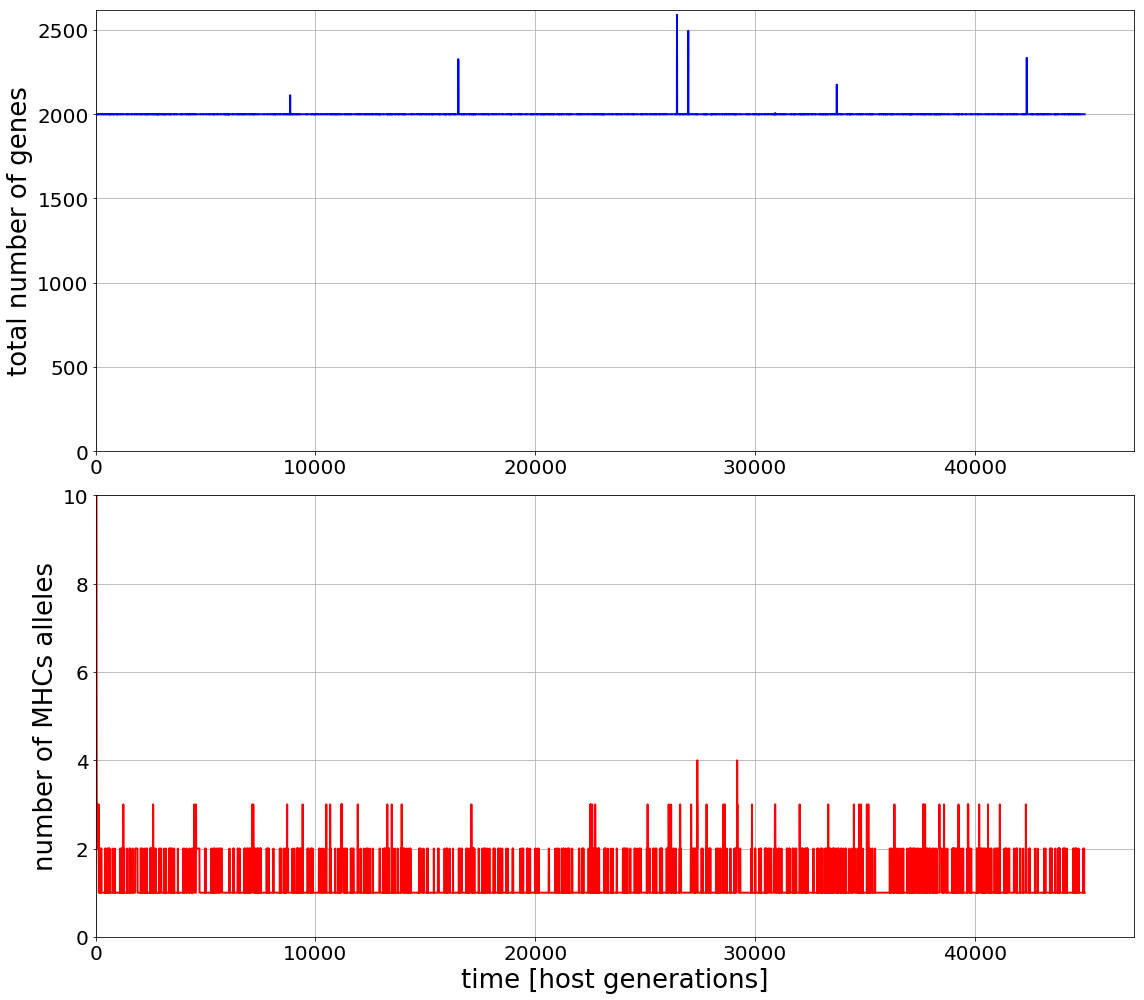

In [334]:
dd = np.genfromtxt("HostsGeneDivers.csv")
plt.figure(1, figsize=(16, 14))
plt.subplot(211)
plt.plot(dd[:,0], dd[:,2], 'b', lw=2)
plt.ylabel("total number of genes", fontsize=LabelFS)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.subplot(212)
plt.plot(dd[:,0], dd[:,3], 'r', lw=2)
plt.ylabel("number of MHCs alleles", fontsize=LabelFS)
plt.xlabel("time [host generations]", fontsize=LabelFS)
plt.ylim((0, 10))
plt.xlim(xmin=0)
plt.yticks(fontsize=TicksFS)
plt.xticks(fontsize=TicksFS)
plt.grid(True)
plt.tight_layout()
plt.savefig("MHC_pop_stats.png")
plt.show()